# Code and Consciousness: An Analysis of the Adoption and Perception of AI Across Developer Demographics and Specializations
This project, titled “Code and Consciousness: An Analysis of the Adoption and Perception of AI Across Developer Demographics and Specializations,” aims to explore how various developer demographics have adopted and perceived artificial intelligence technologies.

Survey Data: [https://survey.stackoverflow.co/2023/#overview ](https://survey.stackoverflow.co/2023/#overview )

In [108]:
# Import data from data/survey_results_public.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data/survey_results_public.csv')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Not all of the data in the survey will be used in this analysis. Cleaning and preprocessing is required to ensure the data is in a usable format.

In [109]:
df_cleaned = df.copy()

# replace any instance of "â€™" with "'"
df_cleaned = df_cleaned.replace("â€™", "'")

# remove spaces in column names
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '')

# remove columns with header name in the list
to_remove = [
    "ResponseId",
    "Q120",
    "CodingActivities",
    "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert",
    "YearsCodePro",
    "PurchaseInfluence", "TechList", "BuyNewTool",
    "Currency", "CompTotal",
    "LanguageWantToWorkWith",
    "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith",
    "PlatformHaveWorkedWith", "PlatformWantToWorkWith",
    "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
    "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith",
    "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith",
    "NEWCollabToolsWantToWorkWith",
    "OpSysPersonaluse",
    "OfficeStackAsyncHaveWorkedWith", "OfficeStackAsyncWantToWorkWith",
    "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith",
    "AISearchHaveWorkedWith", "AISearchWantToWorkWith",
    "AIDevHaveWorkedWith", "AIDevWantToWorkWith",
    "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI",
    "AIAcc", 
    "AIToolInterestedinUsing", "AIToolCurrentlyUsing", "AIToolNotinterestedinUsing",
    "AINextVerydifferent", "AINextNeitherdifferentnorsimilar", "AINextSomewhatsimilar", "AINextVerysimilar", "AINextSomewhatdifferent",
    "TBranch", "ICorPM", "WorkExp",
    "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Knowledge_8",
    "Frequency_1", "Frequency_2", "Frequency_3",
    "TimeSearching", "TimeAnswering",
    "ProfessionalTech", "Industry",
    "SurveyLength", "SurveyEase"
]

df_dropped = df_cleaned.drop(columns=to_remove)

Relevant categorical variables are encoded using one-hot encoding.

In [110]:
# Add coded columns

# Make a copy of the dataframe
df_coded = df_dropped.copy()

# IsProfessionalDev is 1 if MainBranch is "I am a developer by profession" and 0 otherwise
df_coded['IsProfessionalDev'] = np.where(df_coded['MainBranch'] == "I am a developer by profession", 1, 0)

# IsWindowsUser if OpSysProfessionaluse includes "Windows" and 0 otherwise
df_coded['IsWindowsUser'] = np.where(df_coded['OpSysProfessionaluse'].str.contains("Windows", na=False), 1, 0)

# IsMacUser if OpSysProfessionaluse includes "MacOS" and 0 otherwise
df_coded['IsMacUser'] = np.where(df_coded['OpSysProfessionaluse'].str.contains("MacOS", na=False), 1, 0)

# IsPythonDev if LanguageHaveWorkedWith includes "Python" and 0 otherwise
df_coded['IsPythonDev'] = np.where(df_coded['LanguageHaveWorkedWith'].str.contains("Python", na=False), 1, 0)

# IsJavaScriptDev if LanguageHaveWorkedWith includes "JavaScript" or "TypeScript" and 0 otherwise
df_coded['IsJavaScriptDev'] = np.where(df_coded['LanguageHaveWorkedWith'].str.contains("JavaScript|TypeScript", na=False), 1, 0)

# IsVimUser if NEWCollabToolsHaveWorkedWith includes "Vim" and 0 otherwise
df_coded['IsVimUser'] = np.where(df_coded['NEWCollabToolsHaveWorkedWith'].str.contains("Vim", na=False), 1, 0)

# IsVSCodeUser if NEWCollabToolsHaveWorkedWith includes "Visual Studio Code" and 0 otherwise
df_coded['IsVSCodeUser'] = np.where(df_coded['NEWCollabToolsHaveWorkedWith'].str.contains("Visual Studio Code", na=False), 1, 0)

# IsEmployed if Employment contains "Employed" or "Independent contractor, freelancer, or self-employed" and 0 otherwise
df_coded['IsEmployed'] = np.where(df_coded['Employment'].str.contains("Employed|Independent", na=False), 1, 0)

# IsStudent if Employment contains "Student" and 0 otherwise
df_coded['IsStudent'] = np.where(df_coded['Employment'].str.contains("Student", na=False), 1, 0)

# IsEmployedOrStudent if Employment contains "Employed" or "Independent contractor, freelancer, or self-employed" or "Student" and 0 otherwise
df_coded['IsEmployedOrStudent'] = np.where(df_coded['Employment'].str.contains("Employed|Independent|Student", na=False), 1, 0)

# IsNotEmployedOrStudent if Employment contains "Not employed" or "Retired" and 0 otherwise
df_coded['IsNotEmployedOrStudent'] = np.where(df_coded['Employment'].str.contains("Not employed|Retired", na=False), 1, 0)

# IsRemote if RemoteWork is "Remote" or contains "Hybrid" and 0 otherwise
df_coded['IsRemote'] = np.where(df_coded['RemoteWork'].str.contains("Remote|Hybrid", na=False), 1, 0)

# IsInPerson if RemoteWork is "In-person" or contains "Hybrid" and 0 otherwise
df_coded['IsInPerson'] = np.where(df_coded['RemoteWork'].str.contains("In-person|Hybrid", na=False), 1, 0)

# HasGradDegree if EdLevel contains "Master's degree" or "Professional degree" and 0 otherwise
df_coded['HasGradDegree'] = np.where(df_coded['EdLevel'].str.contains("Master|Professional", na=False), 1, 0)

# HasUndergradDegree if EdLevel contains "Bachelor's degree" and 0 otherwise
df_coded['HasUndergradDegree'] = np.where(df_coded['EdLevel'].str.contains("Bachelor", na=False), 1, 0)

# HasSomeCollege if EdLevel contains "Some college/university study without earning a degree" or "Associate degree" and 0 otherwise
df_coded['HasSomeCollege'] = np.where(df_coded['EdLevel'].str.contains("Some college|Associate", na=False), 1, 0)

# HasHighSchool if EdLevel contains "Secondary school"and 0 otherwise
df_coded['HasHighSchool'] = np.where(df_coded['EdLevel'].str.contains("Secondary", na=False), 1, 0)

# HasLessThanHighSchool if EdLevel contains "Primary/elementary school" and 0 otherwise
df_coded['HasLessThanHighSchool'] = np.where(df_coded['EdLevel'].str.contains("Primary", na=False), 1, 0)

# IsUsingAI if AISelect is "Yes" and 0 otherwise
df_coded['IsUsingAI'] = np.where(df_coded['AISelect'] == "Yes", 1, 0)

# IsNotUsingAI if AISelect contains "No" and 0 otherwise
df_coded['IsNotUsingAI'] = np.where(df_coded['AISelect'].str.contains("No", na=False), 1, 0)

# # IsPlanningToUseAI if AISelect contains "plan to soon" and 0 otherwise
df_coded['IsPlanningToUseAI'] = np.where(df_coded['AISelect'].str.contains("plan to soon", na=False), 1, 0)

# # IsNotPlanningToUseAI if AISelect contains "don't plan to" and 0 otherwise
df_coded['IsNotPlanningToUseAI'] = np.where(df_coded['AISelect'].str.contains("don't plan to", na=False), 1, 0)

# Remove columns that were used to create the coded columns
df_coded = df_coded.drop(columns=['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'OpSysProfessionaluse', 'LanguageHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'AISelect'])

# Convert AISent column values from Likert scale (+ Unsure) to Interval
AISent_column = df_coded['AISent']
AISend_column = AISent_column.replace({
    "Very favorable": 5,
    "Favorable": 4,
    "Indifferent": 3,
    "Unfavorable": 2,
    "Very unfavorable": 1,
    "Unsure": 3
})
df_coded = df_coded.drop(columns=['AISent'])
df_coded['AISent'] = AISend_column

# Convert AIBen column values from Likert scale to Interval
AIBen_column = df_coded['AIBen']
AIBen_column = AIBen_column.replace({
    "Highly trust": 5,
    "Somewhat trust": 4,
    "Neither trust nor distrust": 3,
    "Somewhat distrust": 2,
    "Highly distrust": 1
})
df_coded = df_coded.drop(columns=['AIBen'])
df_coded['AIBen'] = AIBen_column

# If value of YearsCode is "Less than 1 year", set value to 0
df_coded['YearsCode'] = df_coded['YearsCode'].replace("Less than 1 year", 0)

# show the columns
print(df_coded.columns)

# Display the first 5 rows
# print(df_coded.head())

Index(['Age', 'YearsCode', 'DevType', 'OrgSize', 'Country',
       'ConvertedCompYearly', 'IsProfessionalDev', 'IsWindowsUser',
       'IsMacUser', 'IsPythonDev', 'IsJavaScriptDev', 'IsVimUser',
       'IsVSCodeUser', 'IsEmployed', 'IsStudent', 'IsEmployedOrStudent',
       'IsNotEmployedOrStudent', 'IsRemote', 'IsInPerson', 'HasGradDegree',
       'HasUndergradDegree', 'HasSomeCollege', 'HasHighSchool',
       'HasLessThanHighSchool', 'IsUsingAI', 'IsNotUsingAI',
       'IsPlanningToUseAI', 'IsNotPlanningToUseAI', 'AISent', 'AIBen'],
      dtype='object')


C:\Users\fourm\AppData\Local\Temp\ipykernel_472\2357724951.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AISend_column = AISent_column.replace({
C:\Users\fourm\AppData\Local\Temp\ipykernel_472\2357724951.py:90: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AIBen_column = AIBen_column.replace({


Explore outliers

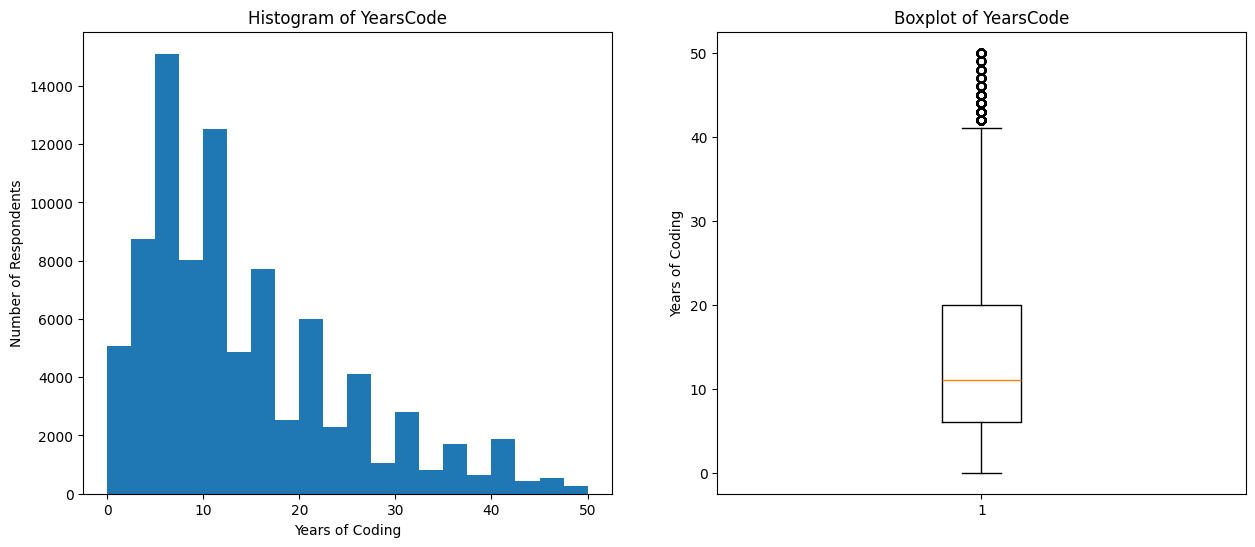

YearsCode Extreme Outliers (> 3xIQR): 24090
count   87082.00
mean       13.82
std        10.31
min         0.00
25%         6.00
50%        11.00
75%        20.00
max        50.00
Name: YearsCode, dtype: float64


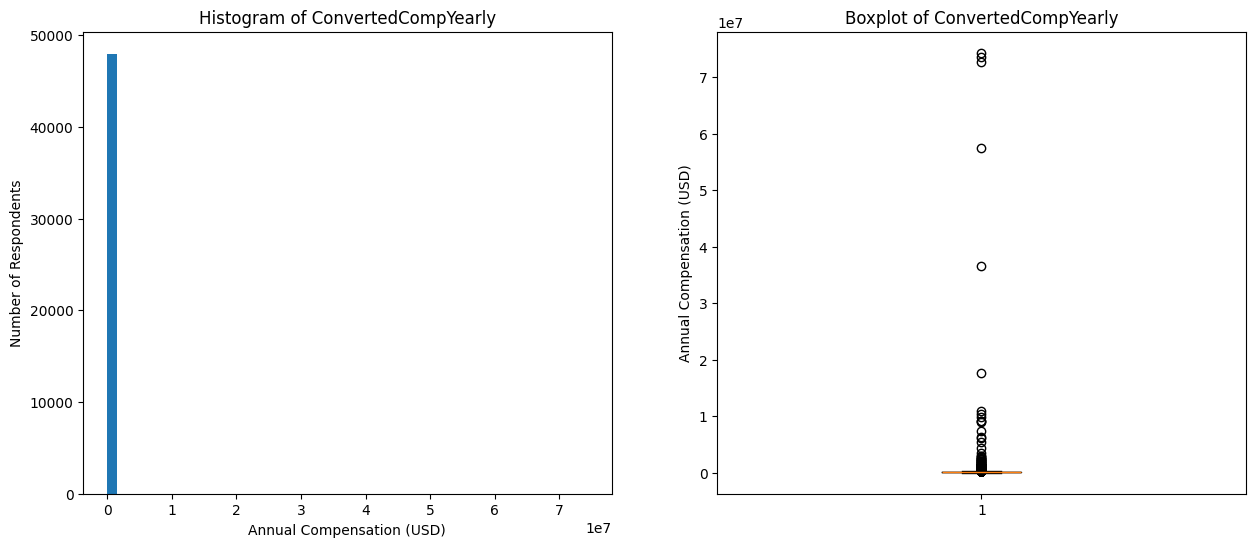

ConvertedCompYearly Extreme Outliers (> 3xIQR): 780
count      48019.00
mean      103110.08
std       681418.84
min            1.00
25%        43907.00
50%        74963.00
75%       121641.00
max     74351432.00
Name: ConvertedCompYearly, dtype: float64


In [111]:
df_outlier = df_coded.copy()

# YearsCode column
# Convert YearsCode to numeric
df_outlier['YearsCode'] = pd.to_numeric(df_outlier['YearsCode'], errors='coerce')

# Histogram and boxplot of YearsCode column
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axs[0].hist(df_outlier['YearsCode'].dropna(), bins=20)
axs[0].set_title('Histogram of YearsCode')
axs[0].set_xlabel('Years of Coding')
axs[0].set_ylabel('Number of Respondents')

# Boxplot
axs[1].boxplot(df_outlier['YearsCode'].dropna())
axs[1].set_title('Boxplot of YearsCode')
axs[1].set_ylabel('Years of Coding')

plt.show()

# Calculate the z-scores of YearsCode
z_scores = (df_outlier['YearsCode'] - df_outlier['YearsCode'].mean()) / df_outlier['YearsCode'].std()

# Find the rows with z-scores greater than 3
outliers = df_outlier[z_scores.abs() > 3]

print(f'YearsCode Extreme Outliers (> 3xIQR): {outliers.size}')
print(df_outlier['YearsCode'].describe())


df_comp_outlier = df_outlier.copy()

# ConvertedCompYearly column
# Ignore but do not remove rows with ConvertedCompYearly values of NA
# Convert ConvertedCompYearly to numeric
na_outliers = df_comp_outlier['ConvertedCompYearly'].isna()

# Remove rows with ConvertedCompYearly values of NA
df_comp_outlier = df_comp_outlier.dropna(subset=['ConvertedCompYearly'])

# Histogram and boxplot of ConvertedCompYearly column
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axs[0].hist(df_comp_outlier['ConvertedCompYearly'], bins=50)
axs[0].set_title('Histogram of ConvertedCompYearly')
axs[0].set_xlabel('Annual Compensation (USD)')
axs[0].set_ylabel('Number of Respondents')

# Boxplot
axs[1].boxplot(df_comp_outlier['ConvertedCompYearly'])
axs[1].set_title('Boxplot of ConvertedCompYearly')
axs[1].set_ylabel('Annual Compensation (USD)')
plt.show()

# Calculate the z-scores of ConvertedCompYearly
z_scores = (df_comp_outlier['ConvertedCompYearly'] - df_comp_outlier['ConvertedCompYearly'].mean()) / df_comp_outlier['ConvertedCompYearly'].std()

# Find the rows with z-scores greater than 3
outliers = df_comp_outlier[z_scores.abs() > 3]

print(f'ConvertedCompYearly Extreme Outliers (> 3xIQR): {outliers.size}')
print(df_comp_outlier['ConvertedCompYearly'].describe())

In [112]:
# Export the cleaned data to a new CSV file (df_coded)
df_coded.to_csv('data/survey_results_public_cleaned.csv', index=False)